In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote
# Use yfinance to download data
df = yf.download('AAPL', start='2018-01-01', end='2025-6-11')
#Show the data
df

C:\Users\HP\AppData\Local\Temp\ipykernel_6516\1042959275.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2018-01-01', end='2025-6-11')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.381004,40.390383,39.677748,39.888727,102223600
2018-01-03,40.373970,40.917824,40.310679,40.444296,118071600
2018-01-04,40.561489,40.664634,40.338792,40.446623,89738400
2018-01-05,41.023308,41.110042,40.566192,40.657615,94640000
2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200
...,...,...,...,...,...
2025-06-04,202.590088,206.006209,201.870903,202.679982,43604000
2025-06-05,200.402573,204.517897,199.923106,203.269314,55126100


In [3]:
#Get the number of rows and columns in the data set
df.shape

(1870, 5)

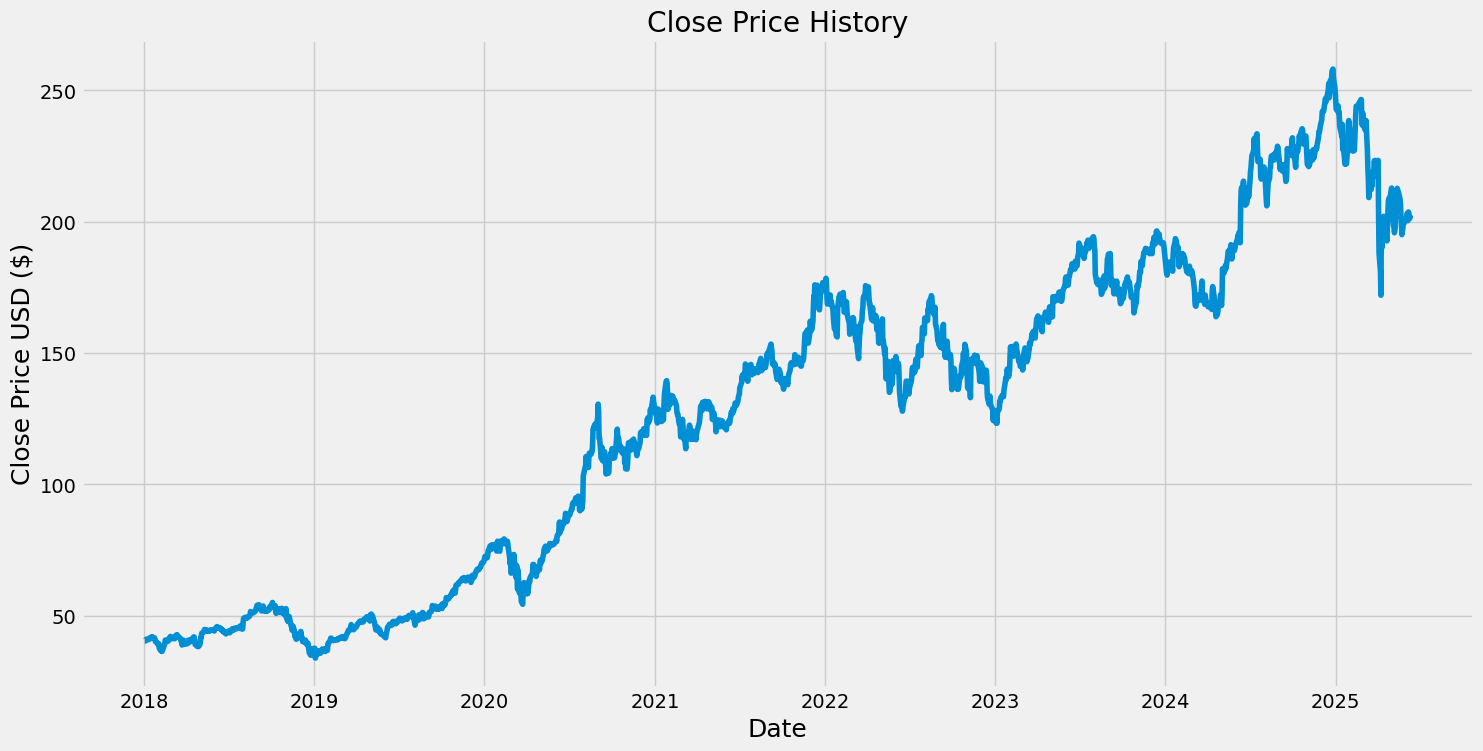

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the Close column
data = df[['Close']]
# Flatten the MultiIndex column
data.columns = ['Close']
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1496

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

scaled_data

array([[0.02919933],
       [0.02916797],
       [0.03000409],
       ...,
       [0.75737019],
       [0.74636926],
       [0.75180291]], shape=(1870, 1))

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.02919933, 0.02916797, 0.03000409, 0.03206329, 0.03138386,
       0.03136298, 0.03132112, 0.03235595, 0.03424783, 0.03330713,
       0.03634872, 0.03651602, 0.03567979, 0.03415379, 0.03419559,
       0.03124797, 0.02799725, 0.02841534, 0.02470475, 0.02366995,
       0.02415074, 0.02451661, 0.01690719, 0.01271576, 0.01955171,
       0.01590376, 0.01131513, 0.01329869, 0.01991062, 0.02162132,
       0.02480126, 0.03069954, 0.03011185, 0.0295031 , 0.02868448,
       0.03018528, 0.03333378, 0.03697563, 0.03636687, 0.03608354,
       0.0328091 , 0.034079  , 0.03471917, 0.03456175, 0.03284051,
       0.03484513, 0.03803561, 0.03986171, 0.0380251 , 0.03641939,
       0.03663971, 0.03597854, 0.03312392, 0.03306092, 0.02889437,
       0.02635455, 0.022251  , 0.03046862, 0.02581931, 0.02386723])]
[np.float64(0.025231609228394458)]

[array([0.02919933, 0.02916797, 0.03000409, 0.03206329, 0.03138386,
       0.03136298, 0.03132112, 0.03235595, 0.03424783, 0.03330713,
       0.03634872, 0.0

In [8]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1436, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
#Compile the  model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size= 1, epochs=1)

1436/1436 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 0.0013


In [13]:
#Create the testing data set
#Create a new array containing scaled values from index 1436 to 1870
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#Convert the data to a numpy array

x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
#Get the models predicted price values
predictions = model.predict(x_test)
# Clip predictions to be within the range [0, 1]
predictions = np.clip(predictions, 0, 1)
# Check for and handle potential NaN or inf values
if np.isnan(predictions).any() or np.isinf(predictions).any():
    # Replace NaN or inf with a valid number, e.g., 0 or the mean of valid predictions
    predictions[np.isnan(predictions)] = 0
    predictions[np.isinf(predictions)] = 0 # Or another appropriate value

predictions = scaler.inverse_transform(predictions)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [16]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

np.float64(6.72579505578495)

C:\Users\HP\AppData\Local\Temp\ipykernel_6516\586142526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


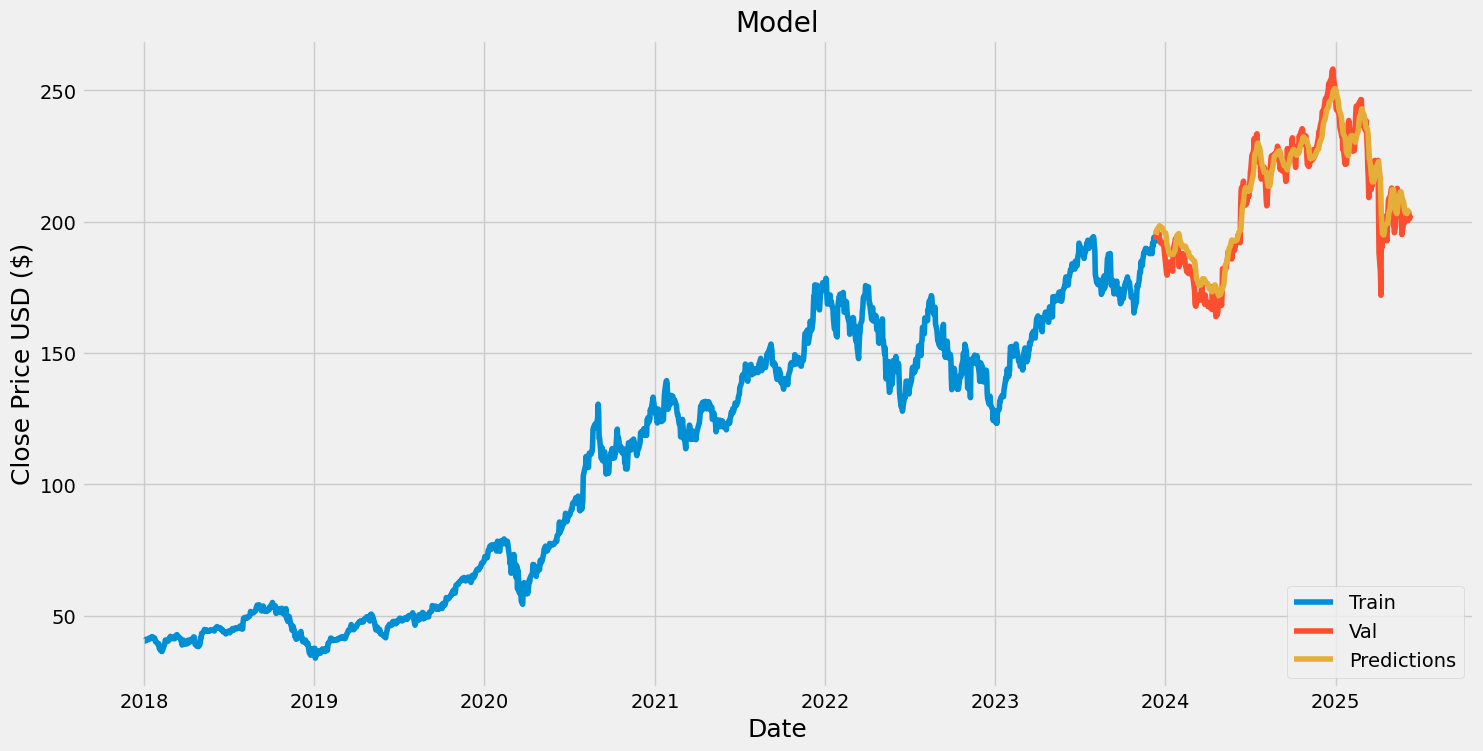

In [17]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-12-12,193.075363,194.987564
2023-12-13,196.298080,195.469299
2023-12-14,196.446808,196.270340
2023-12-15,195.911362,197.130264
2023-12-18,194.245468,197.846039
...,...,...
2025-06-04,202.590088,203.401596
2025-06-05,200.402573,203.838608
2025-06-06,203.688828,204.014114


In [19]:
#Get the quote
apple_quote = yf.download('AAPL', start='2018-01-01', end='2025-6-11')
# Flatten the MultiIndex columns
apple_quote.columns = apple_quote.columns.get_level_values(0)
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

C:\Users\HP\AppData\Local\Temp\ipykernel_6516\1631987350.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download('AAPL', start='2018-01-01', end='2025-6-11')
[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[204.87967]]
